In [16]:
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report

In [17]:
# Generate synthetic dataset

X,y = make_classification(n_samples=500, n_features=2, n_classes=2, n_redundant=0, random_state=42, flip_y=0.1)

In [18]:
# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [19]:
# Train Gradient Boosting Classifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,random_state=42)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=42)

In [20]:
# Make predictions

y_pred = gb_model.predict(X_test)

In [21]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        73
           1       0.87      0.95      0.91        77

    accuracy                           0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



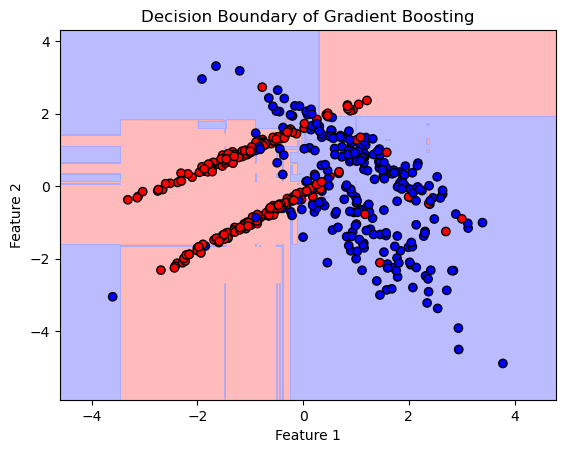

In [22]:
# Decision Boundary Visualization

def plot_decision_boundary(model,X,y):
    x_min,x_max = X[:,0].min() -1,X[:,0].max() +1
    y_min,y_max = X[:,1].min() -1,X[:,1].max() +1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01),
                        np.arange(y_min,y_max,0.01))
    

    Z=model.predict(np.c_[xx.ravel(),yy.ravel()])

    Z= Z.reshape(xx.shape)

    plt.contourf(xx,yy,Z, alpha = 0.8, cmap = ListedColormap(["#FFAAAA","#AAAAFF"]))

    plt.scatter(X[:,0], X[:,1], c=y, edgecolor = 'k', cmap = ListedColormap(["#FF0000","#0000FF"]))

    plt.title("Decision Boundary of Gradient Boosting")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


plot_decision_boundary(gb_model, X,y)